In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
file_path = r"D:\GitHub\ml_331\faithful.csv"
dataset = np.genfromtxt(file_path, delimiter=',')
dataset = dataset[1:,1:]
dataset

array([[ 3.6  , 79.   ],
       [ 1.8  , 54.   ],
       [ 3.333, 74.   ],
       [ 2.283, 62.   ],
       [ 4.533, 85.   ],
       [ 2.883, 55.   ],
       [ 4.7  , 88.   ],
       [ 3.6  , 85.   ],
       [ 1.95 , 51.   ],
       [ 4.35 , 85.   ],
       [ 1.833, 54.   ],
       [ 3.917, 84.   ],
       [ 4.2  , 78.   ],
       [ 1.75 , 47.   ],
       [ 4.7  , 83.   ],
       [ 2.167, 52.   ],
       [ 1.75 , 62.   ],
       [ 4.8  , 84.   ],
       [ 1.6  , 52.   ],
       [ 4.25 , 79.   ],
       [ 1.8  , 51.   ],
       [ 1.75 , 47.   ],
       [ 3.45 , 78.   ],
       [ 3.067, 69.   ],
       [ 4.533, 74.   ],
       [ 3.6  , 83.   ],
       [ 1.967, 55.   ],
       [ 4.083, 76.   ],
       [ 3.85 , 78.   ],
       [ 4.433, 79.   ],
       [ 4.3  , 73.   ],
       [ 4.467, 77.   ],
       [ 3.367, 66.   ],
       [ 4.033, 80.   ],
       [ 3.833, 74.   ],
       [ 2.017, 52.   ],
       [ 1.867, 48.   ],
       [ 4.833, 80.   ],
       [ 1.833, 59.   ],
       [ 4.783, 90.   ],


In [14]:
#Hyperparameter
k = 2

In [15]:
def group(dataset,centroid):
    label = []
    for sample in dataset:
        distance = []
        for centre in centroid:
            dist = np.sum((sample- centre)**2)
            distance.append(dist)
        min_dist = min(distance)
        label.append(distance.index(min_dist))
    return np.array(label)

In [16]:
def reCentre(dataset,label,k):
    centroid = []
    for i in range(k):
        centre = np.zeros(dataset.shape[1])
        count = 0
        for sample in range(dataset.shape[0]):
            if(label[sample] == i):
                centre+= dataset[sample]
                count += 1
        centre = centre / count
        centroid.append(centre)
    return np.array(centroid)

In [17]:
centroid = []
for i in range(k):
    r = np.random.randint(dataset.shape[0])
    centroid.append(dataset[r])
centroid = np.array(centroid)
centroid

array([[ 3.367, 66.   ],
       [ 4.65 , 90.   ]])

In [18]:
tolerance = 1e-5
while(True):
    label = group(dataset,centroid)
    centroid_old = centroid.copy()
    centroid = reCentre(dataset,label,k)
    if(np.sum((centroid - centroid_old)** 2) < tolerance):
        break

In [19]:
centroid

array([[ 2.09433   , 54.75      ],
       [ 4.29793023, 80.28488372]])

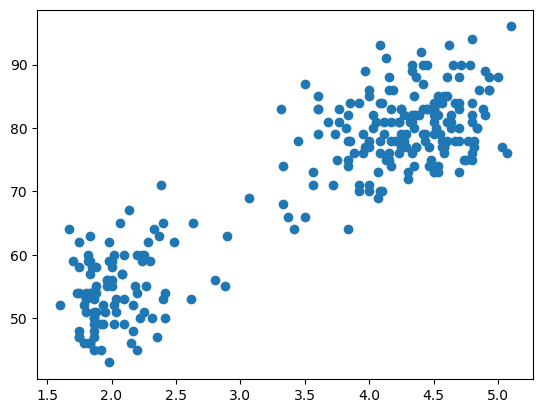

In [20]:
plt.scatter(dataset[:,0],dataset[:,1])

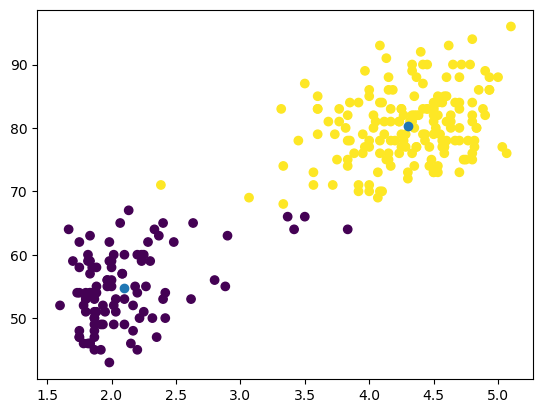

In [21]:
plt.scatter(dataset[:,0], dataset[:,1], c=label*50, cmap='viridis')
plt.scatter(centroid[:,0], centroid[:,1])